       Individual Project 1 - Techniques to Analyze Spatial Data
       Prathvi N Kanchan 1001769152
       University of Texas, Arlington

<h1 align='center' style="color: blue;">Techniques To Analyze Spatial Data</h1>

Spatial data analysis is that branch of data analysis where the geographical referencing of objects contains useful information. Geospatial data is another term for spatial data which is used to describe any data related to information about a  specific location on the Earth's surface.

Below is a list of useful libraries for analyzing spatial data:<br>
<b>Data analysis & visualization</b>:<br>
Numpy –> Fundamental package for scientific computing with Python<br>
Pandas –> High-performance, easy-to-use data structures and data analysis tools<br>
Scipy –> A collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization and statistics<br>
Statsmodels –> Statistical models for Python<br>
Scikit-learn –> Machine learning for Python (classification, regression, clustering, etc.)<br>
Matplotlib –> Basic plotting library for Python<br>
Seaborn –> Statistical data visualization<br>
Bokeh –> Interactive visualizations for the web (also maps)<br>
Plotly –> Interactive visualizations (also maps) for the web (commercial - free for educational purposes)<br>
Dash –> Building analytical web applications with Python (no Javascript required)<br>
<b> GIS: </b><br>
GDAL –> Fundamental package for processing vector and raster data formats (many modules below depend on this). Used for raster processing.<br>
Geopandas –> Working with geospatial data in Python made easier, combines the capabilities of pandas and shapely.<br>
Shapely –> Python package for manipulation and analysis of planar geometric objects (based on widely deployed GEOS).<br>
Fiona –> Reading and writing spatial data (alternative for geopandas).<br>
Pyproj –> Performs cartographic transformations and geodetic computations (based on PROJ.4).<br>
PyCRS –> Working eaily with different CRS specifications (EPSG, ESRI, Proj4)<br>
Pysal –> Library of spatial analysis functions written in Python.<br>
Geopy –> Geocoding library: coordinates to address <-> address to coordinates.<br>
GeoViews –> Interactive Maps for the web.<br>
Geoplot –> High-level geospatial data visualization library for Python.<br>
GeoNotebook –> Desktop GIS-like environment for visualizing and interacting with spatial data using Python (based on Jupyter Notebooks)<br>
OSMnx –> Python for street networks. Retrieve, construct, analyze, and visualize street networks from OpenStreetMap<br>
Networkx –> Network analysis and routing in Python (e.g. Dijkstra and A* -algorithms).<br>
Cartopy –> Make drawing maps for data analysis and visualisation as easy as possible.<br>
Scipy.spatial –> Spatial algorithms and data structures.<br>
Rtree –> Spatial indexing for Python for quick spatial lookups.<br>
Rasterio –> Clean and fast and geospatial raster I/O for Python.<br>
Rasterstats –> A module for summarizing geospatial raster datasets based on vector geometries (e.g. conduct zonal statistics).<br>
RSGISLib –> Remote Sensing and GIS Software Library for Python.

In [7]:
%matplotlib inline
import pandas as pd

Below are few useful terms needed to understand spatial data better:<br>
1)<b> Vector Data</b> : It is the graphical representation of the real world. Points,lines and polygons are the three main types of vector data. Connecting points create lines, and connecting lines that create an enclosed area create polygons. Vectors represent features on the Earth’s surface. Vector data is stored in shapefiles (.shp).<br>
2)<b> Raster Data</b> : It is presented in grid of pixels. Each pixel within a raster has a value,it can be a colour or unit of measurement so as to communicate information about the element in question. Rasters typically refer to imagery. In spatial world it specifically refers to photos taken from satellites or other aerial devices(orthoimagery).<br>
3)<b> Attributes</b> : Additional feature about a data is called attribute. For example, a map displaying buildings within New York City may have additional attributes such as the type of use of the building i.e. government,residence,business,etc, the year it was built, number of floors,etc.<br>
4)<b> Georeferencing and Geocoding</b>:  They are the processes involved in fitting data to the appropriate coordinates of the real world. Georeferencing is the process of assigning coordinates to vectors or rasters.The data used in geocoding are addresses and location descriptors (city, country, etc.).

The most common way that spatial data is processed and analyzed is using a GIS, or, geographic information system.

## 1. Importing geospatial data

In [30]:
#command to install geopandas
conda install -c conda-forge geopandas

In [6]:
import geopandas

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats using the `geopandas.read_file` function.

For example, let's read a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/ and inspect the data:

In [115]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
#countries = geopandas.read_file("/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [57]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


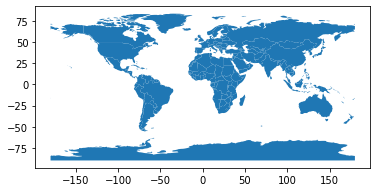

In [14]:
#conda install -c conda-forge descartes
countries.plot()

What can we observe:

- Using `.head()` we can see the first rows of the dataset like the way we do in Pandas.
- There is a 'geometry' column and the different countries are represented as polygons
- We can use the `.plot()` method to quickly get a *basic* visualization of the data

## 1.2 What's a GeoDataFrame?
A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations
A `GeoDataFrame` (or *Feature Collection*) consists of:
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>

In [15]:
type(countries)

geopandas.geodataframe.GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` always returns the column with the geometry information (returning a GeoSeries). It has some extra methods for working with spatial data (area, distance, buffer, intersection,etc)

### 1.2.1 Constructing a GeoDataFrame manually

In [16]:
# we can construct a geodataframe manually 
from shapely.geometry import Point, Polygon, LineString
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

,geometry,attribute1,attribute2
0,POINT (1.00000 1.00000),1,0.1
1,POINT (2.00000 2.00000),2,0.2


### 1.2.2 Constructing a GeoDataFrame from an existing dataframe

In [20]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [21]:
df['Coordinates']  = list(zip(df.Longitude, df.Latitude))

In [25]:
df['Coordinates'] = df['Coordinates'].apply(Point)
df

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [23]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [24]:
gdf

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


For detailed example refer https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py

In [26]:
countries.geometry

0      POLYGON ((61.211 35.650, 62.231 35.271, 62.985...
1      MULTIPOLYGON (((23.904 -11.722, 24.080 -12.191...
2      POLYGON ((21.020 40.843, 21.000 40.580, 20.675...
3      POLYGON ((51.580 24.245, 51.757 24.294, 51.794...
4      MULTIPOLYGON (((-66.960 -54.897, -67.562 -54.8...
5      POLYGON ((43.583 41.092, 44.972 41.248, 45.179...
6      MULTIPOLYGON (((-59.572 -80.040, -59.866 -80.5...
7      POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...
8      MULTIPOLYGON (((145.398 -40.793, 146.364 -41.1...
9      POLYGON ((16.980 48.123, 16.904 47.715, 16.341...
10     MULTIPOLYGON (((46.506 38.771, 46.483 39.464, ...
11     POLYGON ((29.340 -4.500, 29.276 -3.294, 29.025...
12     POLYGON ((4.047 51.267, 4.974 51.475, 5.607 51...
13     POLYGON ((2.692 6.259, 1.865 6.142, 1.619 6.83...
14     POLYGON ((2.154 11.940, 1.936 11.641, 1.447 11...
15     POLYGON ((92.673 22.041, 92.652 21.324, 92.303...
16     POLYGON ((22.657 44.235, 22.945 43.824, 23.332...
17     MULTIPOLYGON (((-77.535 

In [27]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [28]:
countries.geometry.area

0        63.593500
1       103.599439
2         3.185163
3         7.095047
4       278.923392
5         3.030560
6      6028.836194
7         1.432928
8       695.545501
9        10.179604
10        9.642785
11        2.135332
12        3.829997
13        9.641193
14       22.574625
15       11.857175
16       12.119548
17        1.399757
18        5.696666
19       28.301172
20        1.872603
21       92.077173
22      710.185243
23        0.872053
24        3.594123
25       51.837670
26       50.861076
27     1712.995228
28        5.440201
29       86.508469
          ...     
147       8.604719
148      11.745981
149       5.753425
150       2.225310
151      79.446214
152       1.639983
153      18.293965
154     107.167364
155       5.007220
156      42.941255
157      14.272461
158      50.073501
159       1.208939
160       0.639000
161      15.285952
162      83.154626
163       3.043213
164      76.301964
165      19.976533
166      70.591920
167      17.027171
168    1122.

**GeoDataFrame is still a DataFrame**, so have the pandas functionality available to use on the geospatial dataset, and to do data manipulations along with the attributes and geometry information together.

In [42]:
#calculate average population of all countries
countries['pop_est'].mean()

41712369.84180791

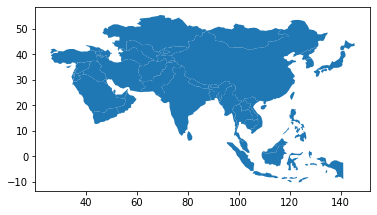

In [43]:
#using boolean filtering to select Asian continent
asia = countries[countries['continent'] == 'Asia']
asia.plot()

## 1.3 Geometries: Points, Linestrings and Polygons
As discussed in the beginning, the 3 fundamental vector data types are: 

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.
Eg: In a google map, a road can be considered as a line.

For an extensive overview please refer https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects

In [44]:
# the individula geometry objects are polygons
print(countries.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395401, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225935, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.37176816334725 41.8775506797835, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024654668023 41.85540891928363, 20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588))


A dataset about cities in the world is an example of point data.(adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, the zip file is attached in the Individual Project 1 folder):

In [38]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [39]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


The dataset of rivers in the world is an example of line datatype.(Adapted from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the attached Individual project 1 folder)

In [40]:
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [41]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


We can use the 'shapely' library to construct our own geometry objects.

In [45]:
from shapely.geometry import Point, Polygon, LineString

In [46]:
p = Point(1, 1)

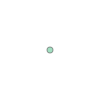

In [47]:
p

In [48]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

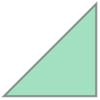

In [49]:
polygon

## 1.4 Coordinate reference systems
A **coordinate reference system (CRS)** determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

For more information refer to https://docs.qgis.org/3.10/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

A GeoDataFrame or GeoSeries has a `.crs` attribute which gives the description of the coordinate reference system of the geometries. EPSG 4326 / WGS84 lon/lat reference system is most used. It uses coordinates as latitude and longitude in degrees, as can be seen from the x/y labels on the plot:

In [50]:
countries.crs

{'init': 'epsg:4326'}

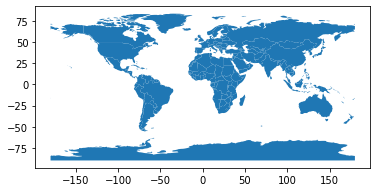

In [51]:
countries.plot()

We need to change the reference system of our dataset when we have:

- different sources with different crs -> need to convert to the same crs
- distance-based operations -> if you have a crs that has meter units (not degrees)
- plotting in a certain crs (eg to preserve area)

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

## 1.5 Plotting different layers together
Each spatial datset can be referred as a layer. 

[(-40, 40), (-20, 60)]

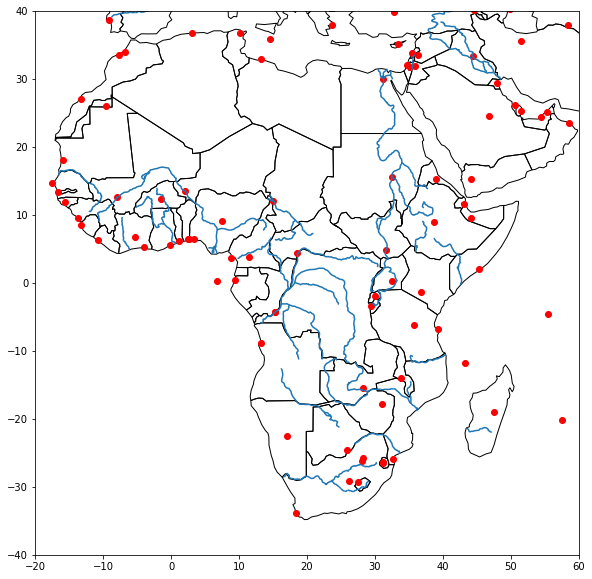

In [52]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

In [172]:
pd.options.display.max_rows = 10
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## 2. Spatial Relationships
We can find the relationship between the spatial objects like whether they intersect, overlap, contain one another, etc.  Let us create a few spatial objects in the following manner and visualize them together.
`squeeze` function is used to extract the scalar geometry object from the GeoSeries of length 1.

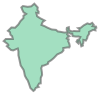

In [168]:
#creating a ploygon
india = countries.loc[countries['name'] == 'India', 'geometry'].squeeze()
india

In [169]:
#creating 2 points
mumbai = cities.loc[cities['name'] == 'Mumbai', 'geometry'].squeeze()
bangalore = cities.loc[cities['name'] == 'Bangalore', 'geometry'].squeeze()

In [170]:
# creating a line-string
from shapely.geometry import LineString
line = LineString([mumbai, bangalore])

Let's visualize the above 4 geometry objects together. The only reason to put them in a GeoSeries is to easily display them together with the geopandas `.plot()` method.

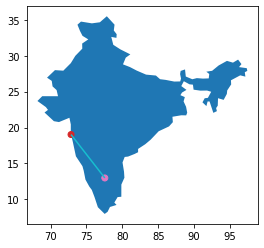

In [171]:
geopandas.GeoSeries([india, mumbai, bangalore, line]).plot(cmap='tab10')

Banglore, the software hub, is thus located within India. This is a spatial relationship, and we can test this using the individual shapely geometry objects as follow:

In [87]:
bangalore.within(india)

True

In [88]:
india.contains(bangalore)

True

In [89]:
bangalore.contains(india)

False

### 2.1 Spatial Relationships with GeoDataFrames
The same methods that are available on individual `shapely` geometries as we have seen above, are also available as methods on `GeoSeries` / `GeoDataFrame` objects.

For example, if we call the `contains` method on the world dataset with the `bangalore` point, it will do this spatial check for each country in the `world` dataframe. We can use ot to filter the dataframe.

In [90]:
countries[countries.contains(bangalore)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
73,IND,India,Asia,1.281936e+09,8721000.0,"POLYGON ((92.67272 22.04124, 92.14603 23.62750..."


Another example, extracting the linestring of the Amazon river in South America, we can query through which countries the river flows:

In [91]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

In [92]:
countries[countries.crosses(amazon)]  # or .intersects

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
22,BRA,Brazil,Asia,207353391.0,3081000.0,"POLYGON ((-57.62513 -30.21629, -56.29090 -28.8..."
35,COL,Colombia,Asia,47698524.0,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
124,PER,Peru,Asia,31036656.0,410400.0,"POLYGON ((-69.52968 -10.95173, -68.66508 -12.5..."


Another useful method is the `unary_union` attribute, which converts the set of geometry objects in a GeoDataFrame into a single geometry object by taking the union of all those geometries. GeoPandas (and Shapely for the individual objects) provides a whole lot of basic methods to analyse the geospatial data (distance, length, centroid, boundary, convex_hull, simplify, transform,etc).

For example, we can construct a single object for the Africa continent:

In [124]:
african_countries = countries[countries['continent'] == 'Africa']
african_countries

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
11,BDI,Burundi,Africa,11466756.0,7892.0,"POLYGON ((29.34000 -4.49998, 29.27638 -3.29391..."
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.15447 11.94015, 1.93599 11.64115, ..."
25,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
...,...,...,...,...,...,...
164,TZA,Tanzania,Africa,53950935.0,150600.0,"POLYGON ((29.34000 -4.49998, 29.75351 -4.45239..."
165,UGA,Uganda,Africa,39570125.0,84930.0,"POLYGON ((29.57947 -1.34131, 29.58784 -0.58741..."
174,ZAF,South Africa,Africa,54841552.0,739100.0,"POLYGON ((19.89577 -24.76779, 20.16573 -24.917..."
175,ZMB,Zambia,Africa,15972000.0,65170.0,"POLYGON ((23.21505 -17.52312, 22.56248 -16.898..."


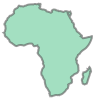

In [125]:
african_countries.unary_union

In [126]:
african_countries

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
11,BDI,Burundi,Africa,11466756.0,7892.0,"POLYGON ((29.34000 -4.49998, 29.27638 -3.29391..."
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.15447 11.94015, 1.93599 11.64115, ..."
25,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
...,...,...,...,...,...,...
164,TZA,Tanzania,Africa,53950935.0,150600.0,"POLYGON ((29.34000 -4.49998, 29.75351 -4.45239..."
165,UGA,Uganda,Africa,39570125.0,84930.0,"POLYGON ((29.57947 -1.34131, 29.58784 -0.58741..."
174,ZAF,South Africa,Africa,54841552.0,739100.0,"POLYGON ((19.89577 -24.76779, 20.16573 -24.917..."
175,ZMB,Zambia,Africa,15972000.0,65170.0,"POLYGON ((23.21505 -17.52312, 22.56248 -16.898..."


### 2.2 Spatial Join Operation
Spatial join is used to transfer attributes from one layer to another using the spatial relationship. In order to do this we need<br>
1) The GeoDataFrame to which we need to add the attribute<br>
2) The GeoDataFrame from which has the attribute we wish to add<br>
3) The spatial relationship which matches the datasets i.e intersect,union,contains,within,etc. <br>
4) The kind of join: inner join or left join<br>

We use the `geopandas.sjoin` function:

In [173]:
joined = geopandas.sjoin(cities, countries, op='within', how='left')

In [174]:
joined.head()

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,62137802.0,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,62137802.0,2221000.0
2,Vaduz,POINT (9.51667 47.13372),9.0,AUT,Austria,Europe,8754413.0,416600.0
3,Lobamba,POINT (31.20000 -26.46667),152.0,SWZ,Swaziland,Africa,1467152.0,11060.0
4,Luxembourg,POINT (6.13000 49.61166),97.0,LUX,Luxembourg,Europe,594130.0,58740.0


In [175]:
joined['continent'].value_counts()

Asia             59
Africa           57
Europe           46
North America    26
South America    14
Oceania           8
Name: continent, dtype: int64

### 2.3 Spatial overlay: 
It constructs new geometries based on spatial operation between both dataframes (and combining attributes of both dataframes)<br>
We use the **overlay** operation if you want to create new geometries by combining/joining geometries of different dataframes into one new dataframe say by taking the intersection of the geometries.

In [176]:
pd.options.display.max_rows = 10
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")
asia = countries[countries['continent'] == 'Asia']

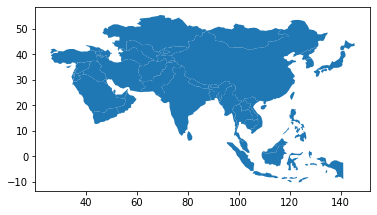

In [177]:
asia.plot()

In [178]:
cities['geometry'] = cities.buffer(2)

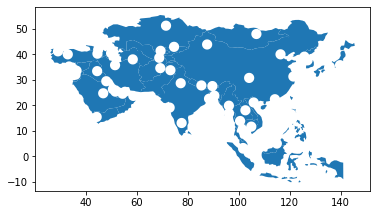

In [179]:
geopandas.overlay(asia, cities, how='difference').plot()

## 3. Visualizing the spatial data using GeoPandas
One of the basic way of visualizing the spatial data is using plot which we studied in our coursework.

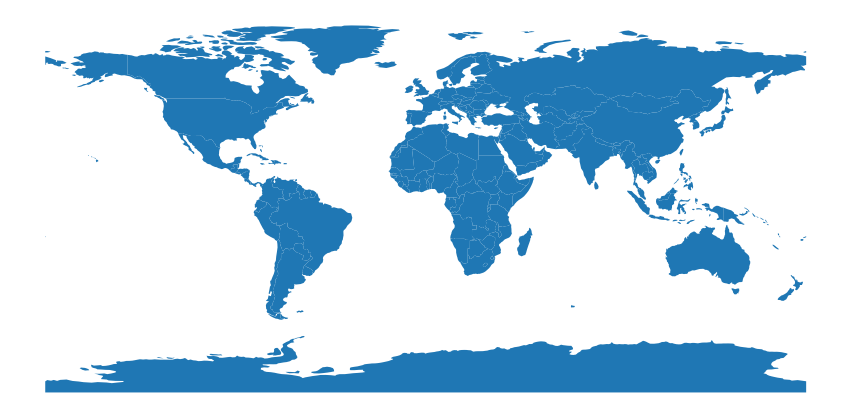

In [149]:
ax = countries.plot(figsize=(15, 15))
ax.set_axis_off()

Sometimes we would require to highlight few countries. So we can try that by coloring countries based on their column values. 

In [182]:
#ommitting the continent Antarctica
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]

C:\Users\kanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


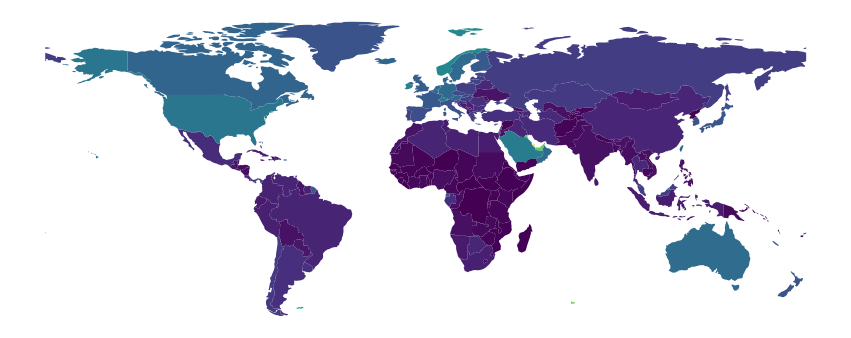

In [183]:
#creating a new column to color the polygons based on gdp per capita
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap')
ax.set_axis_off()

In [158]:
#uncomment the below code if you dont have mapclassify installed
#conda install -c conda-forge mapclassify

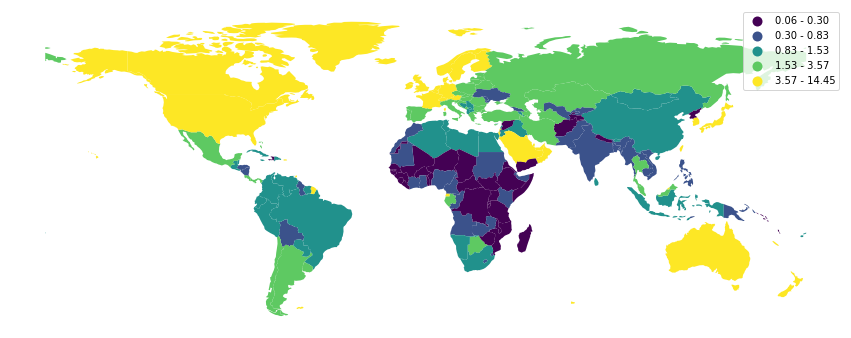

In [184]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap', scheme='quantiles', legend=True)
ax.set_axis_off()

The `.plot` method returns a matplotlib Axes object, which can then be re-used to add additional layers to that plot with the `ax=` keyword:

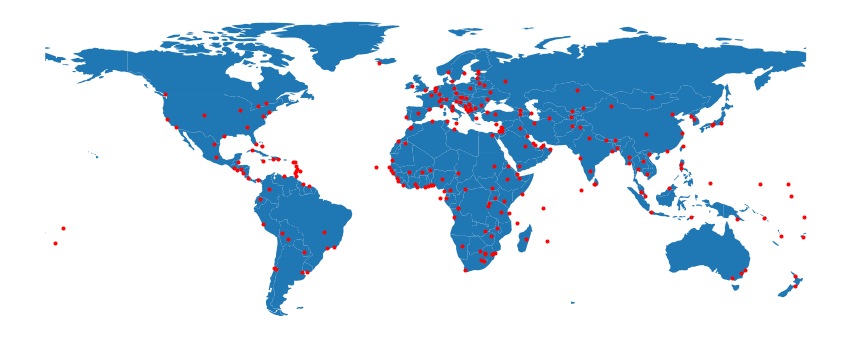

In [186]:
ax = countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='red', markersize=9)
ax.set_axis_off()

[(-40, 40), (-20, 60)]

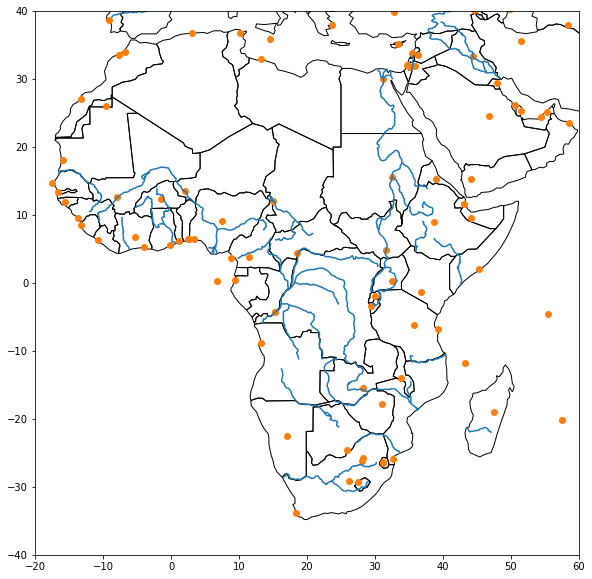

In [187]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='C1')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

The `geoplot` packages provides some additional functionality compared to the basic `.plot()` method on GeoDataFrames:

- High-level plotting API (with more plot types as geopandas)
- Native projection support


In [163]:
#uncomment the below code to install geoplot. It was not running in mine due to hardware issue
#conda install -c conda-forge geoplot

^C

Note: you may need to restart the kernel to use updated packages.


In [190]:
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

C:\Users\kanch\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


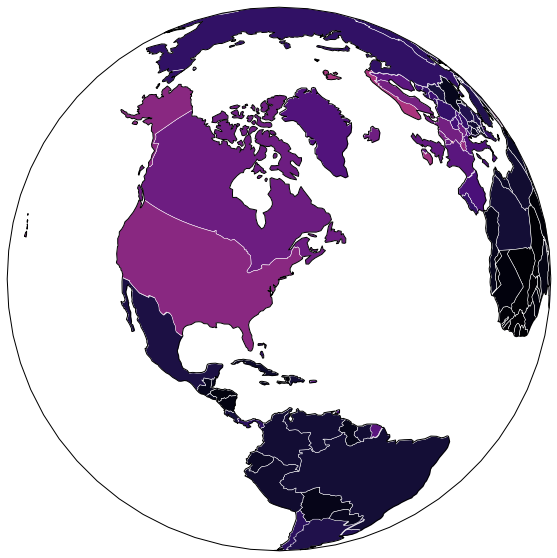

In [193]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=40.7128, central_longitude=-74.0059)
})
geoplot.choropleth(countries, hue='gdp_per_cap', projection=gcrs.Orthographic(), ax=ax,
                   cmap='magma', linewidth=0.5, edgecolor='white')
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()

### 3.1 Choropleth Maps ##

Choropeth maps is a common type of geovizualization used for area unit data with numeric attributes.

Choropleth mapping can be used for different purposes. We can use it to identify either data errors
or extreme values i.e outliers. 

In [195]:
import mapclassify as mc

The power of visualization in the analysis of spatial data can be used for our human pattern recognition machinery.

## 4. Exploratory Analysis of Spatial Data
The purpose here is to complement geovizualization through formal univariate and multivariate statistical tests for spatial clustering.

In [199]:
import geopandas as gpd
df = gpd.read_file('data/berlin-districts.geojson') # this is the airbnb data

In [200]:
df.head()

,district,district_group,median_price,geometry
0,Blankenfelde/Niederschönhausen,Pankow,37.5,"MULTIPOLYGON (((1493006.880 6912074.798, 14929..."
1,Helmholtzplatz,Pankow,58.0,"MULTIPOLYGON (((1493245.549 6900059.696, 14932..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,50.0,"MULTIPOLYGON (((1481381.452 6885170.698, 14813..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,99.0,"MULTIPOLYGON (((1526159.829 6872101.044, 15261..."
4,Müggelheim,Treptow - Köpenick,25.0,"MULTIPOLYGON (((1529265.086 6874326.842, 15292..."


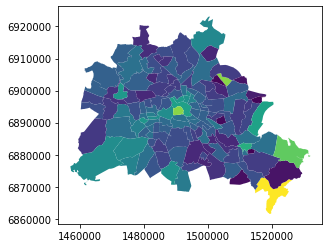

In [201]:
df.plot(column='median_price')

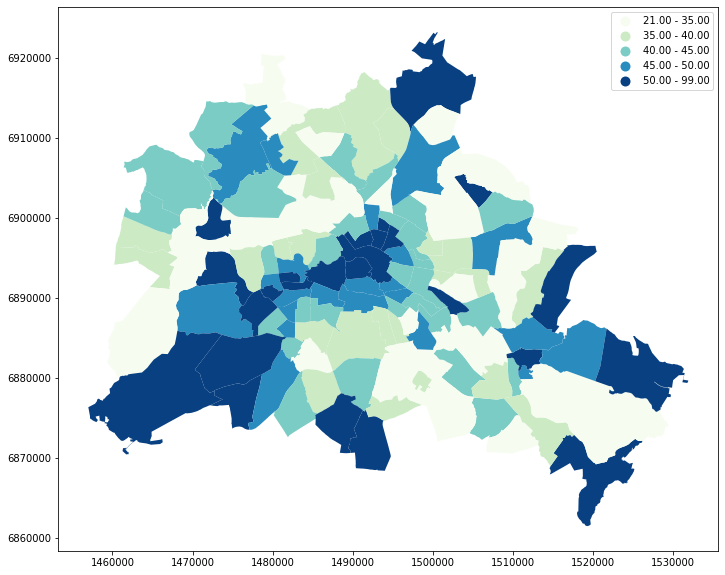

In [202]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw=dict(aspect='equal'))
df.plot(column='median_price', scheme='Quantiles', 
        k=5, cmap='GnBu', legend=True, ax=ax)

We can always have a hunch about spatial autocorrelation of some features by looking at the visualizations above. <b>Moran’s I</b> is one such statistic used to measure global spatial autocorrelation quantitatively for continuous attribute. It takes values between -1 and +1 (like normal correlation coefficient, r, would) while providing an associated p-value as a test for significance (discussed below). A positive Moran’s I indicates that similar observations are closer to each other, whereas negative values imply dissimilar values are clustered. Values around 0 would indicate that there is no autocorrelation, and instead, observed values are randomly distributed.

In [207]:
#uncomment this to install poysal
#conda install -c anaconda pysal

In [206]:
#Moran's I is a test for global autocorrelation for a continuous attribute:
#import numpy as np
#import esda
#np.random.seed(12345)
#mi = esda.moran.Moran(y, wq)
#mi.I 

## 5. Spatial Linear Modeling

### 5.1 Kernel Regression
Kernel regressions are os one common way to allow observations to "borrow strength" from nearby observations. 

However, when working with spatial data, there are *two simultaneous senses of what is near:* 
- things that similar in attribute (classical kernel regression)
- things that are similar in spatial position (spatial kernel regression)

We will use scikit learn to implement these two type of kernel regressions

Here we are trying to predict the log of an Airbnb's nightly price based on the below factors:
- accommodates: the number of people the airbnb can accommodate
- review_scores_rating: the aggregate rating of the listing
- bedrooms: the number of bedrooms the airbnb has
- bathrooms: the number of bathrooms the airbnb has
- beds: the number of beds the airbnb offers

In [216]:
import pandas as pd
import shapely.geometry as shp
import geopandas as gpd
listings = pd.read_csv('./data/berlin-listings.csv.gz')
listings['geometry'] = listings[['longitude','latitude']].apply(shp.Point, axis=1)
listings = gpd.GeoDataFrame(listings)
listings.crs = {'init':'epsg:4269'}
#listings = listings.to_crs(epsg=3857)
listings['geometry']

0        POINT (13.39609 52.58331)
1        POINT (13.39858 52.57642)
2        POINT (13.39926 52.58922)
3        POINT (13.39558 52.58231)
4        POINT (13.39366 52.58375)
                   ...            
20048    POINT (13.35246 52.56949)
20049    POINT (13.35545 52.57206)
20050    POINT (13.32764 52.60240)
20051    POINT (13.33678 52.60993)
20052    POINT (13.69441 52.36929)
Name: geometry, Length: 20053, dtype: geometry

In [219]:
model_data = listings[['accommodates', 'review_scores_rating', 
                       'bedrooms', 'bathrooms', 'beds', 
                       'price','geometry']].dropna()
model_data.head()

,accommodates,review_scores_rating,bedrooms,bathrooms,beds,price,geometry
0,2,100.0,1.0,1.0,2.0,30.0,POINT (13.39609 52.58331)
1,2,80.0,1.0,1.5,1.0,17.0,POINT (13.39858 52.57642)
2,4,96.0,1.0,1.0,1.0,50.0,POINT (13.39926 52.58922)
3,2,96.0,1.0,1.0,1.0,28.0,POINT (13.39558 52.58231)
4,1,90.0,1.0,1.0,1.0,21.0,POINT (13.39366 52.58375)


In [221]:
Xnames = ['accommodates', 'review_scores_rating', 
               'bedrooms', 'bathrooms', 'beds']
X = model_data[Xnames].values
X = X.astype(float)
y = np.log(model_data[['price']].values)
model_data

,accommodates,review_scores_rating,bedrooms,bathrooms,beds,price,geometry
0,2,100.0,1.0,1.0,2.0,30.0,POINT (13.39609 52.58331)
1,2,80.0,1.0,1.5,1.0,17.0,POINT (13.39858 52.57642)
2,4,96.0,1.0,1.0,1.0,50.0,POINT (13.39926 52.58922)
3,2,96.0,1.0,1.0,1.0,28.0,POINT (13.39558 52.58231)
4,1,90.0,1.0,1.0,1.0,21.0,POINT (13.39366 52.58375)
...,...,...,...,...,...,...,...
20044,1,80.0,2.0,1.0,1.0,45.0,POINT (13.36051 52.56775)
20048,2,91.0,1.0,1.0,1.0,37.0,POINT (13.35246 52.56949)
20049,2,93.0,1.0,1.0,1.0,27.0,POINT (13.35545 52.57206)
20050,4,97.0,1.0,2.0,2.0,40.0,POINT (13.32764 52.60240)


In [222]:
# extracting set of coordinates for each location
coordinates = np.vstack(model_data.geometry.apply(lambda p: np.hstack(p.xy)).values)

scikit neighbor regressions are contained in the `sklearn.neighbors` module, and there are two main types:
- `KNeighborsRegressor`, which uses a k-nearest neighborhood of observations around each focal site
- `RadiusNeighborsRegressor`, which considers all observations within a fixed radius around each focal site.

Further, these methods can use inverse distance weighting to rank the relative importance of sites around each focal; in this way, near things are given more weight than far things, even when there's a lot of near things. 

In [223]:
import sklearn.neighbors as skn
import sklearn.metrics as skm

In [224]:
shuffle = np.random.permutation(len(y))
train,test = shuffle[:14000],shuffle[14000:]

So, let's fit three models:
- `spatial`: using inverse distance weighting on the nearest 500 neighbors geograpical space
- `attribute`: using inverse distance weighting on the nearest 500 neighbors in attribute space
- `both`: using inverse distance weighting in both geographical and attribute space. 

In [225]:
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=500)
spatial = KNNR.fit(coordinates[train,:],
                  y[train,:])
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=500)
attribute = KNNR.fit(X[train,:],
                    y[train,])
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=500)
both = KNNR.fit(np.hstack((coordinates,X))[train,:],
                y[train,:])

In [226]:
sp_ypred =  spatial.predict(coordinates[test,:])
att_ypred = attribute.predict(X[test,:])
both_ypred = both.predict(np.hstack((X,coordinates))[test,:])

In [227]:
(skm.explained_variance_score(y[test,], sp_ypred),
 skm.explained_variance_score(y[test,], att_ypred),
 skm.explained_variance_score(y[test,], both_ypred))

(0.11790925608326863, 0.29965680189823984, 0.0031009500361816045)

Less than half of the variance that is explained by nearness in feature/attribute space is explained by nearness in geographical space. Glomming on the geographical information to the feature set makes the model perform horribly. 

One method that can exploit the fact that local data may be more informative in predicting $y$ at site $i$ than distant data is Geographically Weighted Regression, which is a type of Generalized Additive Spatial Model. Similar to Kernel Regression, GWR conducts a bunch of regressions at each training site only considering data near that site. This means it works like the kernel regressions above, but uses *both* the coordinates *and* the data in $X$ to predict $y$ at each site. It optimizes its sense of "local" depending on some information criteria or fit score.

## 6. Clustering

### 6.1Point Clustering
We can use point data to find regions where airbnbs colocate. 

In [231]:
listings = pd.read_csv('./data/berlin-listings.csv.gz')
listings['geometry'] = listings[['longitude','latitude']].apply(shp.Point, axis=1)
listings = gpd.GeoDataFrame(listings)
listings.crs = {'init':'epsg:4269'}
listings.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,geometry
0,0,17260587,https://www.airbnb.com/rooms/17260587,20170507222235,2017-05-08,Kunterbuntes Zimmer mit eigenem Bad für jedermann,"Meine Unterkunft ist gut für paare, alleinreis...",NaN,"Meine Unterkunft ist gut für paare, alleinreis...",none,...,f,NaN,NaN,t,flexible,f,f,3,2.00,POINT (13.39609 52.58331)
1,1,17227881,https://www.airbnb.com/rooms/17227881,20170507222235,2017-05-08,Modernes Zimmer in Berlin Pankow,Es ist ein schönes gepflegtes und modernes Zim...,Das Haus befindet sich direkt vor eine Tram Ha...,Es ist ein schönes gepflegtes und modernes Zim...,none,...,f,NaN,NaN,t,flexible,f,f,1,1.29,POINT (13.39858 52.57642)
2,2,1153584,https://www.airbnb.com/rooms/1153584,20170507222235,2017-05-08,Gästezimmer Berlin-Pankow,Unser Gästezimmer befindet sich im Dachgeschos...,"Wenn Ihr eine anspruchsvolles Ambiente sucht, ...",Unser Gästezimmer befindet sich im Dachgeschos...,none,...,f,NaN,NaN,f,flexible,f,f,1,1.27,POINT (13.39926 52.58922)
3,3,7832750,https://www.airbnb.com/rooms/7832750,20170507222235,2017-05-08,Sonniges Doppelzimmer+Nice Price!,Welcome! Hier vermiete ich ein kleines Wohlfüh...,Die Wohnung ist durch Ihre Lage sehr schön hel...,Welcome! Hier vermiete ich ein kleines Wohlfüh...,none,...,f,NaN,NaN,t,flexible,f,f,1,5.43,POINT (13.39558 52.58231)
4,4,11634962,https://www.airbnb.com/rooms/11634962,20170507222235,2017-05-08,Room for womens in Pankow 30 min from the city,Gemütliches Zimmer im ruhigen Teil von Berlin....,"Es handelt sich um ein großes, gemütliches Zim...",Gemütliches Zimmer im ruhigen Teil von Berlin....,none,...,f,NaN,NaN,f,flexible,f,f,1,1.45,POINT (13.39366 52.58375)


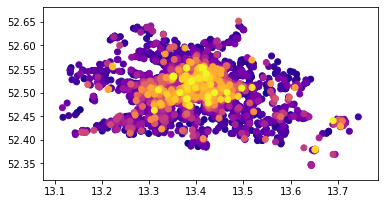

In [230]:
listings.sort_values('price').plot('price', cmap='plasma')

`sklearn` isn't conversant in geodataframes amd we are interested in location we'll need to get the point array from the geodataframe:

In [232]:
import sklearn.cluster as skc
coordinates = listings['geometry'].apply(lambda p: np.hstack(p.xy)).values
coordinates = np.vstack(coordinates)

Here, we'll use a local DBSCAN(density-based scan clusterer),which we learnt in class. It works by fitting clusters of nearby points using the `eps` distance, which is the furthest distance at which points are considered to be in each other's clusters.

In [233]:
clusterer = skc.DBSCAN(eps=1000).fit(coordinates)

In [234]:
#indices of the observations found to be "cores" of the clusters detected
clusterer.core_sample_indices_

array([    0,     1,     2, ..., 20050, 20051, 20052], dtype=int64)

In [235]:
# the quantity of interest here, the main thing we wanted to detect is the labels
clusterer.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [236]:
#number of clusters discovered is
nclusters = clusterer.p

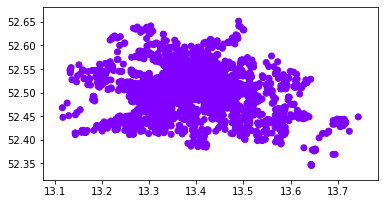

In [237]:
#To map the clusters, we need to assign them back to the dataframe 
listings.assign(labels=clusterer.labels_).plot('labels', k=nclusters, cmap='rainbow')

There are other clustering methods such as probablistoc clustering,areal clustering, contiguous clustering that can be used apart from the above one.

References:
1) Introduction to Geospatial Data Analysis with Python you tube video by Serge Ray
2) https://github.com/geopandas/scipy2018-geospatial-data (got the data files and explanation from here)
3) https://www.safe.com/what-is/spatial-data/ (for definition)